In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class KALMAN_FILTER:
    def __init__(self, P, A, Q, H, R):
        '''
        P: Predicted estimate covariance
        A: The state-transition model
        Q: The covariance of the process noise
        H: The observation model
        R: The covariance of the observation noise
        K: Kalman gain
        '''        
        self.P = P
        self.A = A        
        self.Q = Q
        self.H = H
        self.R = R
        self.K = None

    def step(self, x, z):
        # Predict
        x = np.dot(self.A, x)
        self.P = np.dot(self.A, np.dot(self.P, self.A.T)) + self.Q
        
        # Kalman Gain
        self.K = np.dot(np.dot(self.P, self.H.T), np.linalg.pinv(np.dot(self.H, np.dot(self.P, self.H.T)) + self.R))
        
        # Estimate
        x = x + np.dot(self.K, (z-np.dot(self.H, x)))
        
        # Update P
        self.P = self.P - np.dot(self.K, np.dot(self.H, self.P))
        
        return x

In [3]:
# Set Random Seed
np.random.seed(42)

# Generate Data
position = 0
velocity = 80
dt = 0.1

num = 100
mea_pos = []
mea_vel = []
for i in range(num):
    t = dt * i
    p = velocity * t + 10 * np.random.randn()
    v = velocity + 10 * np.random.randn()
    mea_pos.append(p)
    mea_vel.append(v)

### Position Measurement

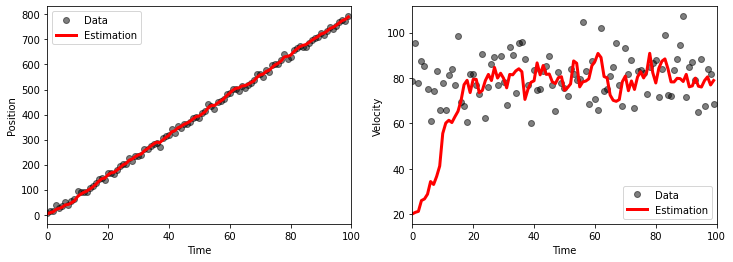

In [4]:
# Set Parameters
x = np.matrix([[0], [20]])
P = np.matrix([[5, 0], [0, 5]])
A = np.matrix([[1, 0.1], [0, 1]])
Q = np.matrix([[1, 0], [0, 3]])
R = np.matrix([10])
H = np.matrix([[1, 0]])

# Process
kalman = KALMAN_FILTER(P, A, Q, H, R)
est_pos = []
est_vel = []
Ps = []
Ks = []
for z in mea_pos:
    z = np.matrix([z])
    x = kalman.step(x, z)
    est_pos.append(x[0, 0])
    est_vel.append(x[1, 0])

# Graph
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(mea_pos, 'o', color='k', alpha=0.5, label='Data')
plt.plot(est_pos, lw=3, color='r', label='Estimation')
plt.legend()
plt.xlim(0, num)
plt.xlabel('Time')
plt.ylabel('Position')

plt.subplot(1, 2, 2)
plt.plot(mea_vel, 'o', color='k', alpha=0.5, label='Data')
plt.plot(est_vel, lw=3, color='r', label='Estimation')
plt.legend()
plt.xlim(0, num)
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.show()

### Velocity Measurement

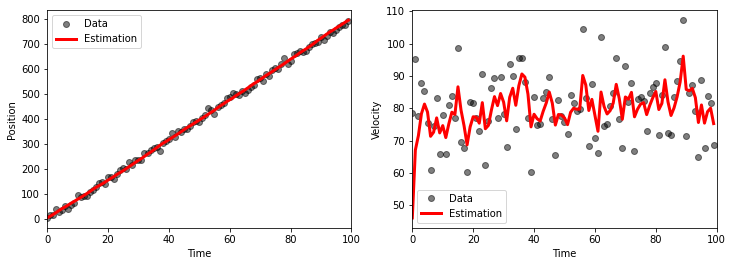

In [5]:
# Set Parameters
x = np.matrix([[0], [20]])
P = np.matrix([[5, 0], [0, 5]])
A = np.matrix([[1, 0.1], [0, 1]])
Q = np.matrix([[1, 0], [0, 3]])
R = np.matrix([10])
H = np.matrix([[0, 1]])

# Process
kalman = KALMAN_FILTER(P, A, Q, H, R)
est_pos = []
est_vel = []
Ps = []
Ks = []
for z in mea_vel:
    z = np.matrix([z])
    x = kalman.step(x, z)
    est_pos.append(x[0, 0])
    est_vel.append(x[1, 0])

# Graph
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(mea_pos, 'o', color='k', alpha=0.5, label='Data')
plt.plot(est_pos, lw=3, color='r', label='Estimation')
plt.legend()
plt.xlim(0, num)
plt.xlabel('Time')
plt.ylabel('Position')

plt.subplot(1, 2, 2)
plt.plot(mea_vel, 'o', color='k', alpha=0.5, label='Data')
plt.plot(est_vel, lw=3, color='r', label='Estimation')
plt.legend()
plt.xlim(0, num)
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.show()